<a href="https://colab.research.google.com/github/yohanesnuwara/geostatistics/blob/main/project_notebooks/imagelog_volve_15_9_F_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/yohanesnuwara/formation-evaluation

Cloning into 'formation-evaluation'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 114 (delta 50), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (114/114), 8.05 MiB | 2.80 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

!pip install lasio
import lasio

import sys
sys.path.append("/content/formation-evaluation")
from well_log_display import *

In [2]:
from google.colab import drive
drive.mount('/content/drive') # yohannesnuwara@gmail.com Drive

Mounted at /content/drive


In [5]:
lasfile = "/content/drive/MyDrive/GeoDatasets_Collaborative/Volve/Image log/WLC_PETRO_COMPUTED_INPUT_1~LF1~FRM1.las"

wireline = lasio.read(lasfile)
wireline_df = wireline.df().reset_index()

wireline_df["DEPTH"] = wireline_df["DEPTH"] / 3.281

wireline_df

,DEPTH,DRHO,DT,DTS,GR,NPHI,PEF,RD,RHOB,RS,RT
0,172.508382,NaN,NaN,NaN,4.5204,NaN,NaN,NaN,NaN,NaN,NaN
1,172.660774,NaN,NaN,NaN,6.6952,NaN,NaN,NaN,NaN,NaN,NaN
2,172.813167,NaN,NaN,NaN,8.8701,NaN,NaN,NaN,NaN,NaN,NaN
3,172.965559,NaN,NaN,NaN,11.0450,NaN,NaN,NaN,NaN,NaN,NaN
4,173.117952,NaN,NaN,NaN,10.9670,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23469,3749.009753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23470,3749.162146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23471,3749.314538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23472,3749.466931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


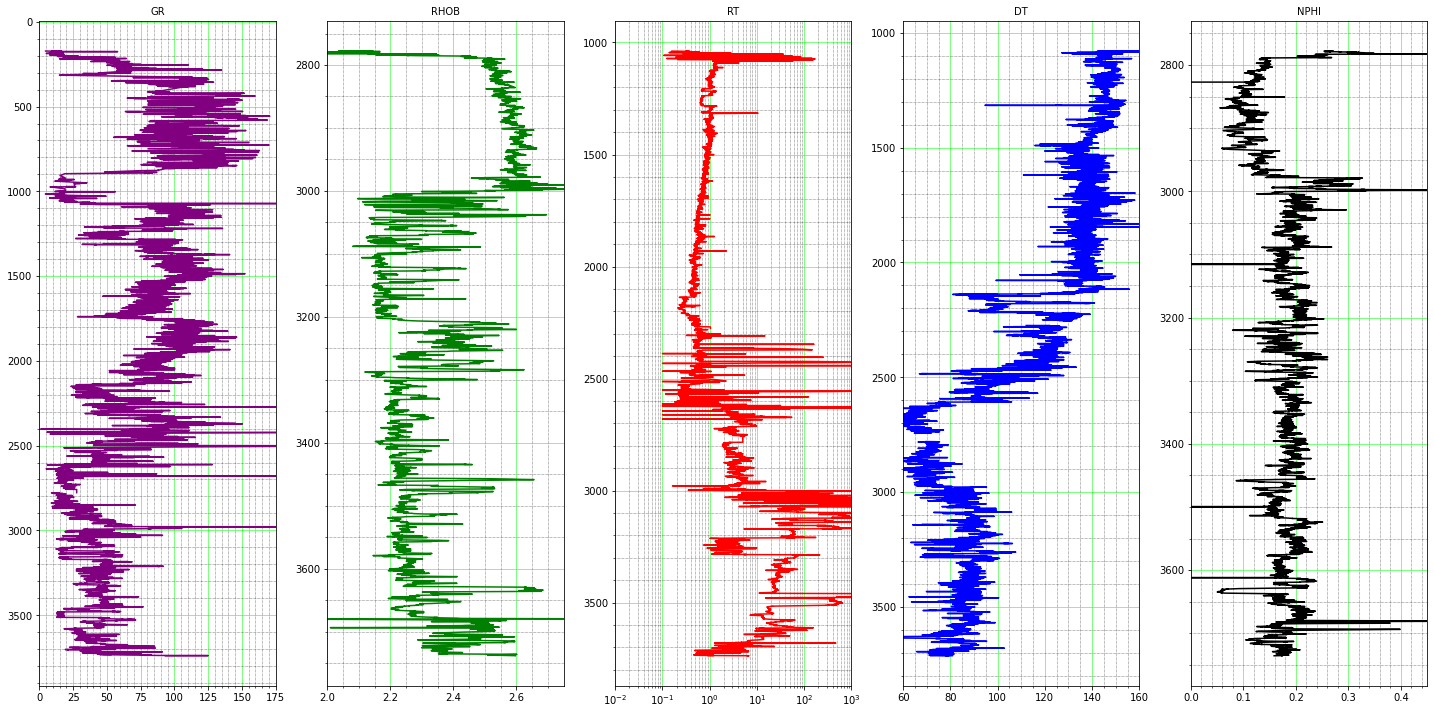

In [20]:
well_log_display(wireline_df, "DEPTH", ["GR", "RHOB", "RT", "DT", "NPHI"],
                 column_semilog=2, colors=["purple", "green", "red", "blue", "black"],
                 column_min=[0, 2, .01, 60, 0], column_max=[175, 2.75, 1E+3, 160, .45])

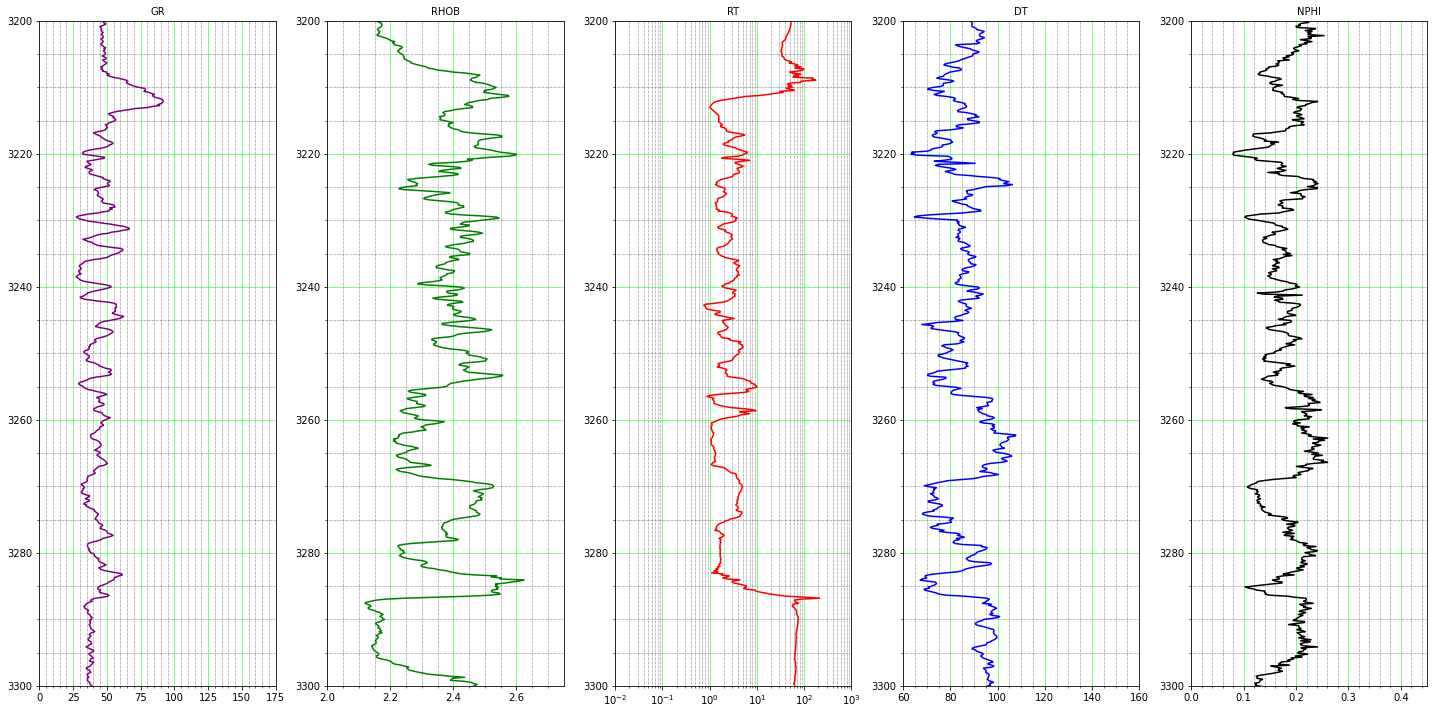

In [22]:
well_log_display(wireline_df, "DEPTH", ["GR", "RHOB", "RT", "DT", "NPHI"],
                 column_semilog=2, colors=["purple", "green", "red", "blue", "black"],
                 column_min=[0, 2, .01, 60, 0], column_max=[175, 2.75, 1E+3, 160, .45],
                 min_depth=3200, max_depth=3300)

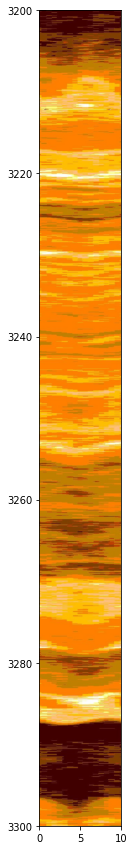

In [29]:
data = image.imread('/content/imagelog_3200_3300_m.jpg')

plt.figure(figsize=(8,15))

plt.imshow(data, extent=(0,10,3300,3200))
plt.show()

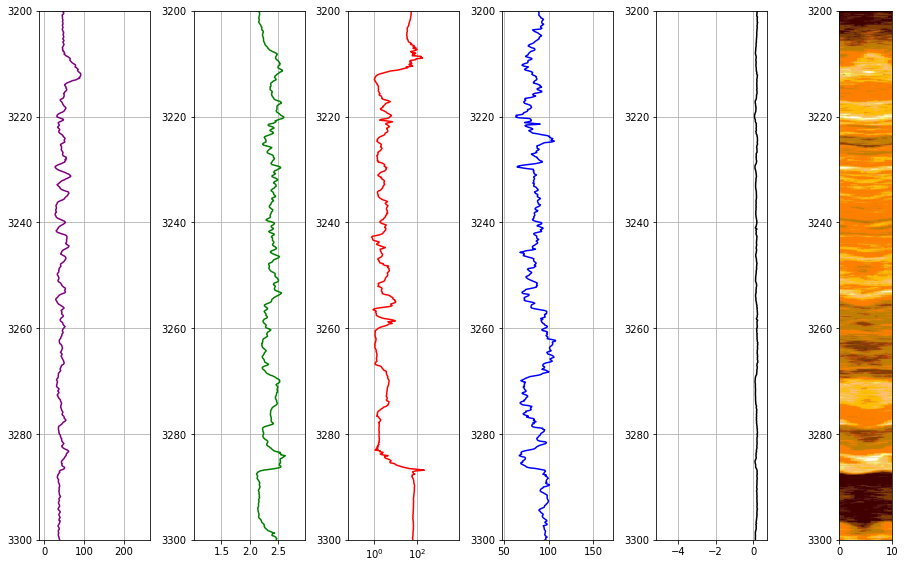

In [50]:
df = wireline_df
logs = ["GR", "RHOB", "RT", "DT", "NPHI"]
colors=["purple", "green", "red", "blue", "black"]

plt.figure(figsize=(13,8))

for i in range(len(logs)):
  plt.subplot(1,6,i+1)
  if i == 2:
    plt.semilogx(df[logs[i]], df["DEPTH"], color=colors[i])    
  else:
    plt.plot(df[logs[i]], df["DEPTH"], color=colors[i])   
  plt.ylim(3300,3200)
  plt.grid() 

plt.subplot(1,6,6)
plt.imshow(data, extent=(0,10,3300,3200))

plt.tight_layout(1.1)
plt.show()

In [51]:
data.shape

(2510, 236, 3)